In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch as tc
import matplotlib.pyplot as plt

In [16]:
lr = 0.01 # Learning rate n = 0.01, total number of iterations is 100
it_time = 100


In [17]:
x = tc.tensor([1], dtype=tc.float64, requires_grad=True) #Initial point x = 1 (can be randomly assigned)

In [15]:
print('-----------------------------------------------------------')

-----------------------------------------------------------


In [9]:
coordinates = tc.zeros((it_time, 2), dtype=tc.float64) # Used for recording the values of x, y at each iteration step:
for t in range(it_time):
    y = x ** 2
    coordinates[t, 0] = x.data
    coordinates[t, 1] = y.data
    y.backward()

    # Update x using the gradient formula (Note: use x.data when updating,
    # which means this computation is not part of the backpropagation itself, only the value is calculated)
    x.data = x.data - lr * x.grad

    # Clear the gradient to avoid logical errors
    x.grad.zero_() # x.grad.zero_() or x.grad.data.zero_() ?

In [11]:
print('-----------------------------------------------------------')

-----------------------------------------------------------


In [13]:
x = tc.tensor([1], dtype=tc.float64, requires_grad=True)
optimizer = tc.optim.Adam([x], lr=lr) # new an Adam optimizer, which stores a list of parameters
coordinates1 = tc.zeros((it_time, 2), dtype=tc.float64) # store the location
for t in range(it_time):
    y = x ** 2
    coordinates1[t, 0] = x.data
    coordinates1[t, 1] = y.data
    y.backward()
    optimizer.step() # run optimization on the list
    optimizer.zero_grad() # clean the gradients of the elements' in the list

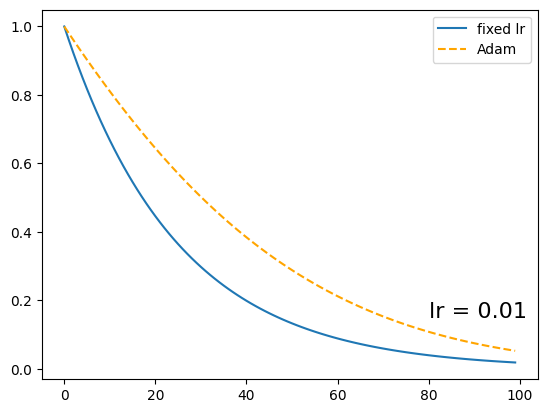

In [14]:
line1, = plt.plot(list(range(it_time)), coordinates[:, 1])
line2, = plt.plot(list(range(it_time)), coordinates1[:, 1],
                  linestyle='--', color='orange')
plt.legend([line1, line2], ['fixed lr', 'Adam'])
plt.text(80, 0.15, 'lr = %g' % lr, fontsize=16)
plt.show()